/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9625

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1936
           1       0.26      0.09      0.14        64

    accuracy                           0.96      2000
   macro avg       0.62      0.54      0.56      2000
weighted avg       0.95      0.96      0.95      2000



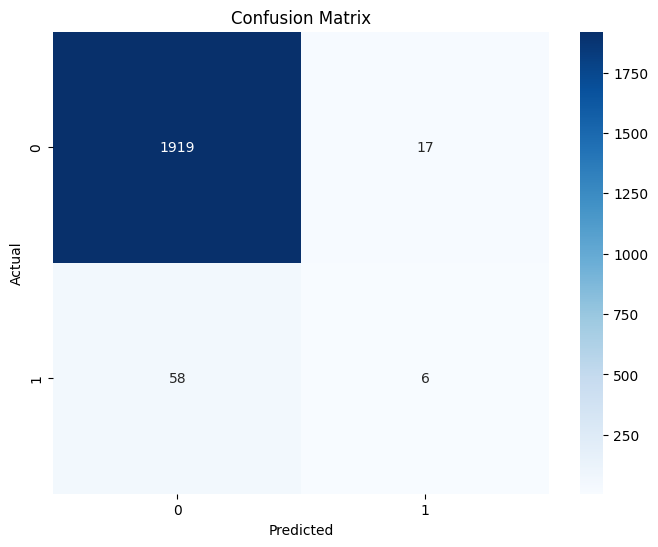

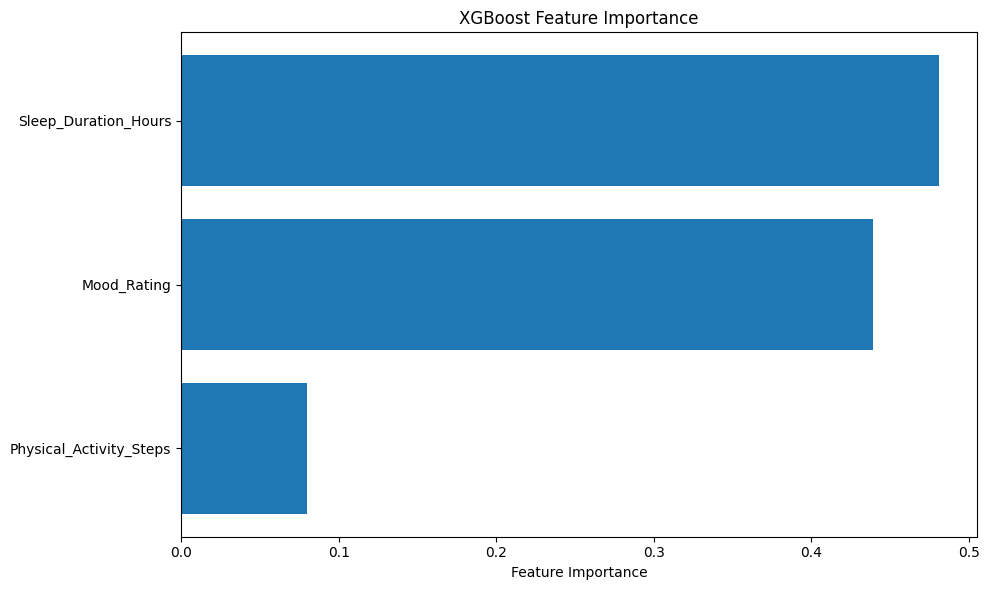

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Cross-validation Scores: [0.963125 0.960625 0.96     0.9675   0.965   ]
Mean CV Score: 0.96325


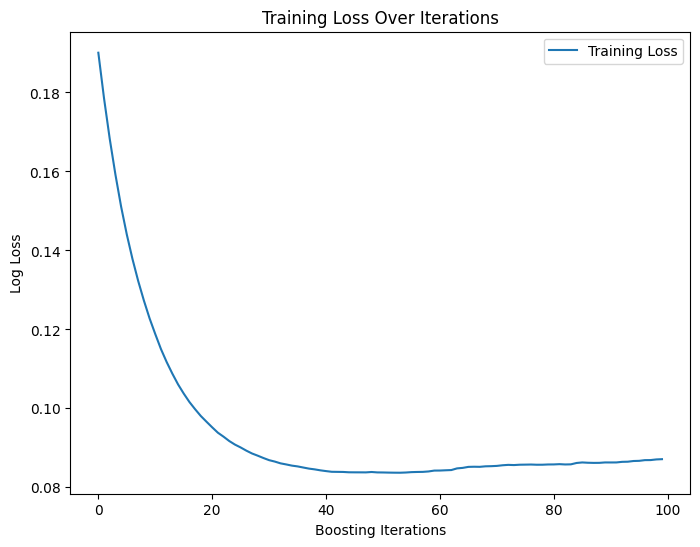

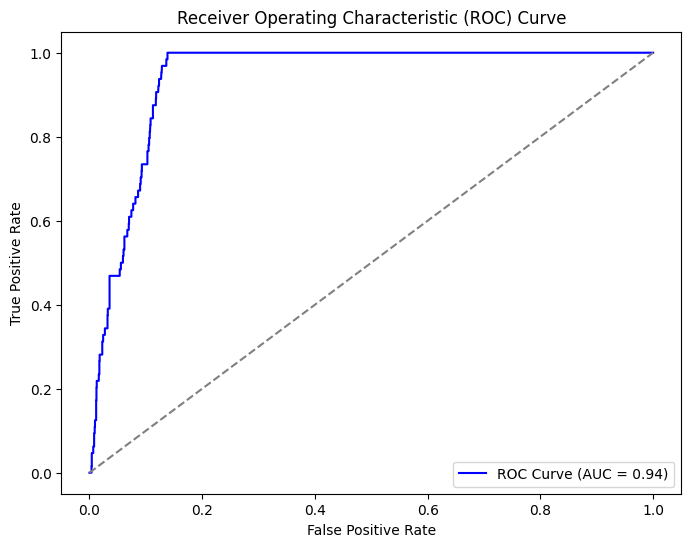

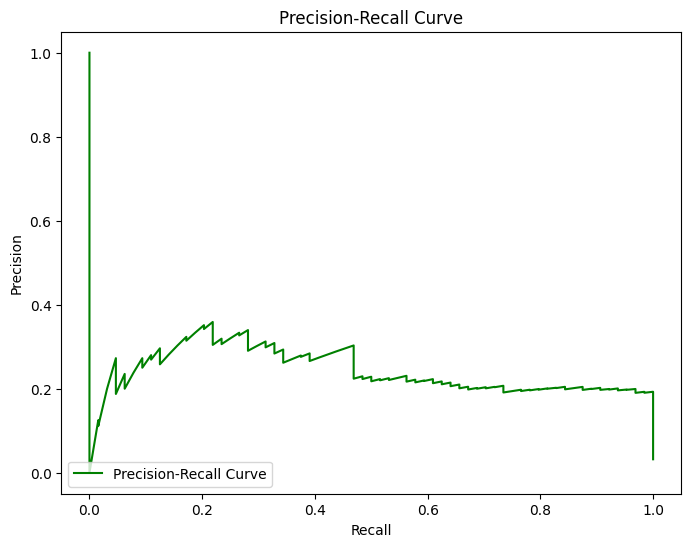

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

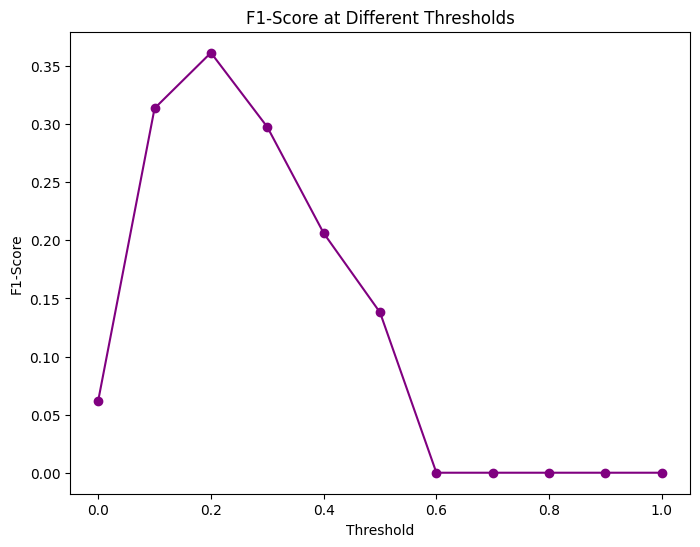

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Change this path manually to test different databases
data_path = '/content/data.csv'

# Load the dataset
df = pd.read_csv(data_path)

# If the first column is an index column, drop it
if df.columns[0] == 'Heart_Rate_BPM':
    df = df.iloc[:, 1:]

# Separate features and target variable
X = df.drop('Mental_Health_Condition', axis=1)
# Ensure the target variable contains only 0 and 1
y = df['Mental_Health_Condition']
if not set(y.unique()).issubset({0, 1}):
    print("Invalid target values detected. Cleaning target variable...")
    y = (y >= 0.5).astype(int)  # Convert continuous or erroneous values to binary


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
history = model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=False)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Training loss plot
evals_result = model.evals_result()
plt.figure(figsize=(8, 6))
plt.plot(evals_result['validation_0']['logloss'], label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Boosting Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

# F1-scores at different thresholds
thresholds = np.arange(0.0, 1.1, 0.1)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    report = classification_report(y_test, y_pred_threshold, output_dict=True)
    f1_scores.append(report['1']['f1-score'])

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o', color='purple')
plt.title('F1-Score at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.show()